## This works on "tra" kernal virtual environment

The things we will learn here is about stocks and traing strategies and wht time series data etc.<br>
An introduction to time series data and some of the most common financial analysis, such as moving windows, volatility calculation, with Python package Pandas.<br>
We will develop a simple momentum strategy, first going through the development process step by step and start by formulating and coding up the simple algorithmic trading strategy.<br>
Then we'll backtest the formulated trading strategy with Pandas, zipline and Quantopian.<br>
Then optimizations in the strategy to make it perform better and eventually evaluate strategy's performance and robustness.<br><br>

# Getting Started


In [3]:
import pandas_datareader as pdr
import datetime

In [4]:
aapl = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2006, 10, 1), end=datetime.datetime(2012, 1, 1))


In [5]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.299011
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.275057
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.314981
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.298089
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.279357
...,...,...,...,...,...,...
2011-12-23,14.413929,14.267500,14.274643,14.404643,269399200,12.386595
2011-12-27,14.610357,14.393571,14.396429,14.518929,265076000,12.484868
2011-12-28,14.580357,14.333571,14.531786,14.380000,228662000,12.365404


The above DataFrame consists of a time series data.

In [6]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1323 entries, 2006-10-02 to 2011-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1323 non-null   float64
 1   Low        1323 non-null   float64
 2   Open       1323 non-null   float64
 3   Close      1323 non-null   float64
 4   Volume     1323 non-null   int64  
 5   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 72.4 KB


In [7]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,7.309392,7.126921,7.225253,7.222288,7.531586e+08,6.210466
std,3.549753,3.507440,3.530783,3.529933,4.108027e+08,3.035400
min,2.642143,2.592857,2.622143,2.615357,1.574944e+08,2.248953
25%,4.438215,4.295536,4.364465,4.357857,4.488148e+08,3.747333
50%,6.410714,6.181429,6.315000,6.280000,6.519464e+08,5.400190
75%,9.783215,9.587857,9.694285,9.675000,9.264920e+08,8.319561
max,15.239286,14.856786,15.062857,15.080000,3.372970e+09,12.967335


In [8]:
import pandas as pd

In [10]:
aapl.to_csv('data/aapl.csv')

In [11]:
df = pd.read_csv('data/aapl.csv')

In [12]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.299011
1,2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.275057
2,2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.314981
3,2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.298089
4,2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.279357


In [14]:
df['Close'][-10:]

1313    13.607857
1314    13.650357
1315    14.141071
1316    14.158929
1317    14.233929
1318    14.404643
1319    14.518929
1320    14.380000
1321    14.468571
1322    14.464286
Name: Close, dtype: float64

In [16]:
df.loc[5]

Date         2006-10-09
High           2.681429
Low            2.626071
Open           2.635714
Close          2.665357
Volume        438222400
Adj Close      2.291948
Name: 5, dtype: object

Besides indexing, you might also want to explore some other techniques to get to know your data a little bit better. You never know what else will show up. Let’s try to sample some 20 rows from the data set and then let’s resample the data so that aapl is now at the monthly level instead of daily. You can make use of the sample() and resample() functions to do this:

In [17]:
# sample 20 rows
sample = aapl.sample(20)
print(sample)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-05-23  11.999286  11.765000  11.784643  11.942857   383600000  10.269693
2011-11-10  14.186071  13.648214  14.179643  13.757857   744752400  11.830421
2010-01-12   7.491786   7.372143   7.471071   7.418571   594459600   6.379251
2006-12-04   3.287500   3.232143   3.281429   3.254286   709536800   2.798369
2006-10-18   2.691786   2.639643   2.669643   2.661786  1133907600   2.288877
2010-06-22   9.856071   9.696429   9.720000   9.780357   717262000   8.410158
2009-10-09   6.810714   6.736429   6.748929   6.802500   293272000   5.849488
2009-06-30   5.135714   5.064286   5.092143   5.086786   434224000   4.374142
2009-09-10   6.187500   6.100357   6.145000   6.162857   491134000   5.299459
2011-06-24  11.898214  11.610357  11.834643  11.655357   439807200  10.022475
2007-02-08   3.089643   3.050357   3.051071   3.077857   6790308

In [18]:
# Resample to monthly level
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl)

                 High        Low       Open      Close        Volume  \
Date                                                                   
2006-10-31   2.780942   2.723279   2.750731   2.754497  6.539980e+08   
2006-11-30   3.078656   3.007245   3.040391   3.048027  6.588040e+08   
2006-12-31   3.136625   3.051393   3.103964   3.088268  8.445396e+08   
2007-01-31   3.220214   3.130643   3.180589   3.174339  1.360489e+09   
2007-02-28   3.095733   3.027951   3.063026   3.061711  7.222292e+08   
...               ...        ...        ...        ...           ...   
2011-08-31  13.637500  13.255326  13.473587  13.455807  7.018521e+08   
2011-09-30  14.186480  13.859524  14.013554  14.017619  5.703547e+08   
2011-10-31  14.350595  13.983061  14.169422  14.186786  6.257823e+08   
2011-11-30  13.888554  13.631650  13.795289  13.743401  4.268429e+08   
2011-12-31  14.130884  13.933554  14.027517  14.033231  3.003111e+08   

            Adj Close  
Date                   
2006-10-31   2.

In [24]:
aapl['diff'] = aapl.Open - aapl.Close


In [25]:
aapl.diff

<bound method DataFrame.diff of                  High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2006-10-02   2.709643   2.653571   2.682143   2.673571  712639200   2.299011   
2006-10-03   2.676786   2.613929   2.658929   2.645714  790708800   2.275057   
2006-10-04   2.695000   2.612857   2.646429   2.692143  829082800   2.314981   
2006-10-05   2.720000   2.647500   2.661786   2.672500  683883200   2.298089   
2006-10-06   2.680000   2.636071   2.657857   2.650714  466958800   2.279357   
...               ...        ...        ...        ...        ...        ...   
2011-12-23  14.413929  14.267500  14.274643  14.404643  269399200  12.386595   
2011-12-27  14.610357  14.393571  14.396429  14.518929  265076000  12.484868   
2011-12-28  14.580357  14.333571  14.531786  14.380000  228662000  12.365404   
2011-12-29  14.487500  14.303929  14.407143  14.468571  215978000  12.441566   
2011-12-

In [21]:
# del aapl['diff']

In [26]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.299011,0.008572
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.275057,0.013215
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.314981,-0.045714
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.298089,-0.010714
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.279357,0.007143


In [27]:
aapl

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.299011,0.008572
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.275057,0.013215
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.314981,-0.045714
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.298089,-0.010714
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.279357,0.007143
...,...,...,...,...,...,...,...
2011-12-23,14.413929,14.267500,14.274643,14.404643,269399200,12.386595,-0.130000
2011-12-27,14.610357,14.393571,14.396429,14.518929,265076000,12.484868,-0.122499
2011-12-28,14.580357,14.333571,14.531786,14.380000,228662000,12.365404,0.151786


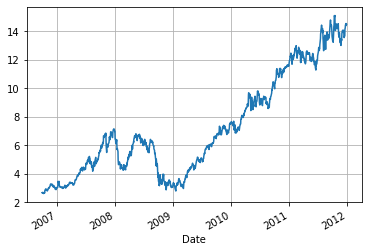

In [29]:
import matplotlib.pyplot as plt

# PLot the closing prices for aapl
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

# Common Financial Analysis
